<a href="https://colab.research.google.com/github/Gkannan03/Task_6_Linear_Regression/blob/main/Copy_of_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [116]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [117]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


The dataset doesnot contain any null values

In [118]:
df.dtypes         # Checking data type

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [119]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


Outlier detection

In [120]:
for i in df.columns:
  iqr=df[i].quantile(0.75)-df[i].quantile(0.25)
  upper_thres=df[i].quantile(0.75)+1.5*iqr
  lower_thres=df[i].quantile(0.25)-1.5*iqr
  print(i,"Upper_threshold_limit", upper_thres)
  print(i,"lower_threshold_limit", lower_thres)

Chirps/Second Upper_threshold_limit 19.699999999999996
Chirps/Second lower_threshold_limit 12.9
Ground Temperature Upper_threshold_limit 98.4
Ground Temperature lower_threshold_limit 58.400000000000006


There is no outlier found

EDA

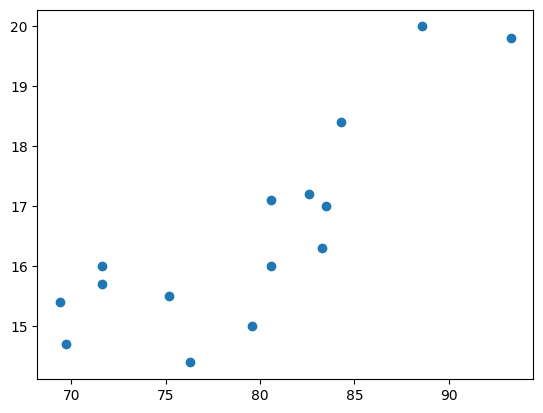

In [121]:
plt.scatter(df['Ground Temperature'], df['Chirps/Second'])
plt.show()

In [122]:
df[['Ground Temperature','Chirps/Second']].corr()

,Ground Temperature,Chirps/Second
Ground Temperature,1.000000,0.832042
Chirps/Second,0.832042,1.000000


There is a strong correlation found between Ground temperature and Chirps/Second

In [123]:
X=df[['Ground Temperature']].values
y=df['Chirps/Second'].values

print(X)
print(y)

[[88.6]
 [71.6]
 [93.3]
 [84.3]
 [80.6]
 [75.2]
 [69.7]
 [71.6]
 [69.4]
 [83.3]
 [79.6]
 [82.6]
 [80.6]
 [83.5]
 [76.3]]
[20.  16.  19.8 18.4 17.1 15.5 14.7 15.7 15.4 16.3 15.  17.2 16.  17.
 14.4]


In [ ]:
from sklearn.model_selection import train_test_split                    # Splitting the data into train, test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=7)

Model

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
regressor.intercept_

0.016895822443036224

In [ ]:
regressor.coef_

array([0.20925191])

Equation is 
y=0.016895822443036224+0.20925191*X

In [ ]:
y_pred=regressor.predict(X_test)
y_pred

array([14.5389787 , 15.75263981, 16.67334823, 19.54009946])

2. Chart the original data and the equation on the chart.

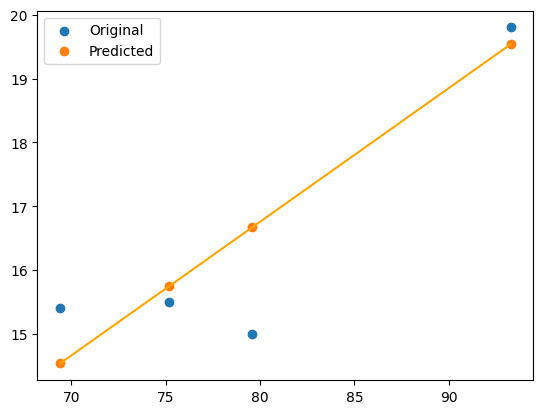

In [128]:
plt.scatter(X_test, y_test, label= 'Original')
plt.scatter(X_test, y_pred, label= 'Predicted')
plt.plot(X_test, y_pred, color='orange')
plt.legend()

3. Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [22]:
from sklearn import metrics
print('R^2 value:',metrics.r2_score(y_test, y_pred))

R^2 value: 0.7603766340072573


4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [23]:
pred=regressor.predict([[95]])
print('The chirps/sec at 95 ground temp is:',pred)

The chirps/sec at 95 ground temp is: [19.89582772]


5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [129]:
Chirps=18
Temp_val=(Chirps-0.016895822443036224)/0.20925191
print('The Temperature Value at crickets chirping rate of 18/sec is:',Temp_val)

The Temperature Value at crickets chirping rate of 18/sec is: 85.93997625903134


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [26]:
df = pd.read_fwf("brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [27]:
df.shape

(62, 2)

In [28]:
df.isnull().sum()     # Checking for null values

Brain    0
Body     0
dtype: int64

In [29]:
df.duplicated().sum()       # Checking for duplicated values

0

In [30]:
df.dtypes             # Checking data type of the column

Brain    float64
Body     float64
dtype: object

In [31]:
df.shape            

(62, 2)

(array([60.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([5.0000000e-03, 6.6540450e+02, 1.3308040e+03, 1.9962035e+03,
        2.6616030e+03, 3.3270025e+03, 3.9924020e+03, 4.6578015e+03,
        5.3232010e+03, 5.9886005e+03, 6.6540000e+03]),
 <BarContainer object of 10 artists>)

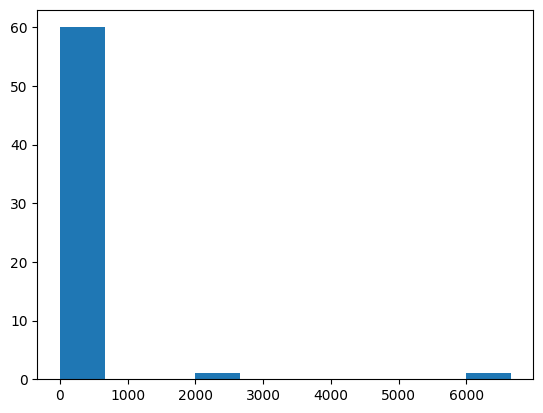

In [32]:
plt.hist(df.Brain)

(array([57.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([1.400000e-01, 5.713260e+02, 1.142512e+03, 1.713698e+03,
        2.284884e+03, 2.856070e+03, 3.427256e+03, 3.998442e+03,
        4.569628e+03, 5.140814e+03, 5.712000e+03]),
 <BarContainer object of 10 artists>)

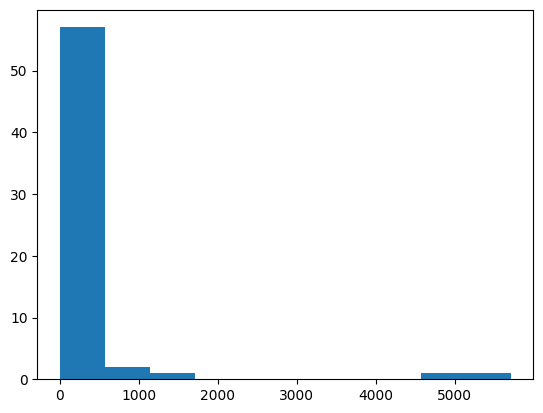

In [33]:
plt.hist(df.Body)

In [34]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


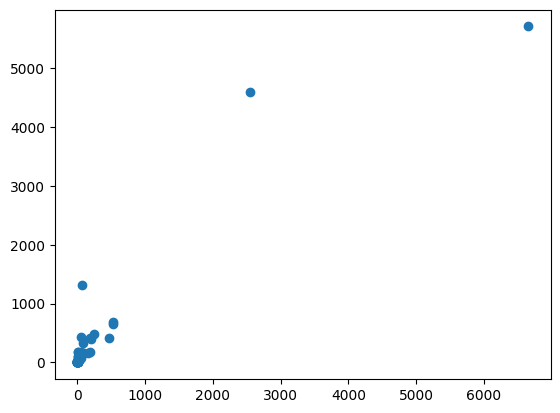

In [35]:
plt.scatter(df['Brain'], df['Body'])

In [36]:
df[['Brain','Body']].corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


Outlier detection

In [39]:
for i in df.columns:
  iqr_1=df[i].quantile(0.75)-df[i].quantile(0.25)
  up_thres=df[i].quantile(0.75)+1.5*iqr_1
  low_thres=df[i].quantile(0.25)-1.5*iqr_1
  print(i, "Upper_threshold", up_thres)
  print(i, "Lower_threshold", low_thres)

Brain Upper_threshold 119.60625
Brain Lower_threshold -70.80375000000001
Body Upper_threshold 408.625
Body Lower_threshold -238.375


There are some data points that are too large, but they are all original datasets. so don't impute or leave those.

Model

In [40]:
X1=df[['Brain']].values       # Feature
y1=df['Body'].values          # Target

In [48]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.25)
from sklearn.linear_model import LinearRegression
regressor_1n=LinearRegression()
regressor_1n.fit(X1_train,y1_train)
y1_pred=regressor_1n.predict(X1_test)
y1_pred

array([  36.2686393 , 8289.39114919,   33.21583404,   45.01753242,
       3192.69554012,   36.95117706,  270.19294471,   96.65461649,
         32.89938471,   32.5208865 ,   44.33499466,  108.86583753,
         36.39273707,   75.35943834,   32.60775494,   31.99967585])

In [49]:
print(pd.DataFrame({"actual":y1_test,'Predicted':y1_pred}))

    actual    Predicted
0      3.9    36.268639
1   5712.0  8289.391149
2      5.5    33.215834
3    179.5    45.017532
4   4603.0  3192.695540
5     17.0    36.951177
6    180.0   270.192945
7    440.0    96.654616
8      3.5    32.899385
9     15.5    32.520887
10   115.0    44.334995
11  1320.0   108.865838
12    21.0    36.392737
13    56.0    75.359438
14     2.4    32.607755
15     1.0    31.999676


In [50]:
from sklearn import metrics
print('R2 value for Test :', metrics.r2_score(y1_test,y1_pred))
print('R2 value for Train :', metrics.r2_score(X1_train,y1_train))

R2 value for Test : 0.7760765950653514
R2 value for Train : 0.5848740030476249


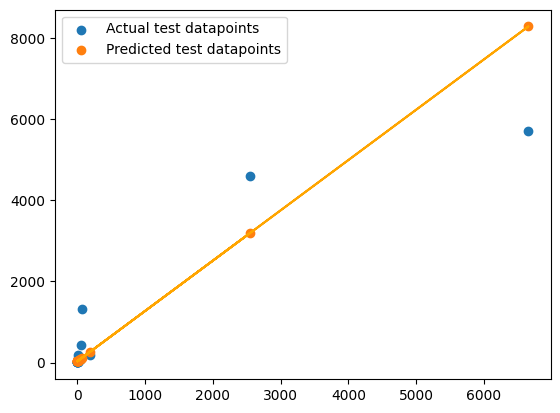

In [71]:
#plt.scatter(df['Brain'],df['Body'])
plt.scatter(X1_test,y1_test, label='Actual test datapoints')
plt.scatter(X1_test,y1_pred, label='Predicted test datapoints')
plt.plot(X1_test,y1_pred, color='orange')
plt.legend()

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [72]:
df2 = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df2

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [73]:
df2.shape

(52, 6)

In [74]:
df2.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [75]:
df2.duplicated().sum()

0

In [76]:
df2.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [77]:
df2.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [79]:
for i in df2.columns:
  iqr_2=df2[i].quantile(0.75)-df2[i].quantile(0.25)
  up_thres=df2[i].quantile(0.75)+1.5*iqr_2
  low_thres=df2[i].quantile(0.25)-1.5*iqr_2
  print(i, "upper_threshold", up_thres)
  print(i, "lower_threshold",low_thres)

Sex upper_threshold 2.5
Sex lower_threshold -1.5
Rank upper_threshold 6.0
Rank lower_threshold -2.0
Year upper_threshold 23.0
Year lower_threshold -9.0
Degree upper_threshold 2.5
Degree lower_threshold -1.5
YSdeg upper_threshold 48.0
YSdeg lower_threshold -18.0
Salary upper_threshold 40776.125
Salary lower_threshold 4729.125


There is no outlier found

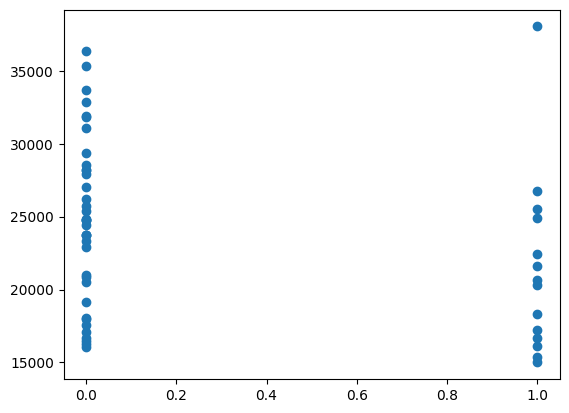

In [80]:
plt.scatter(df2.Sex, df2.Salary)

In [81]:
df2[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


<Axes: xlabel='Rank'>

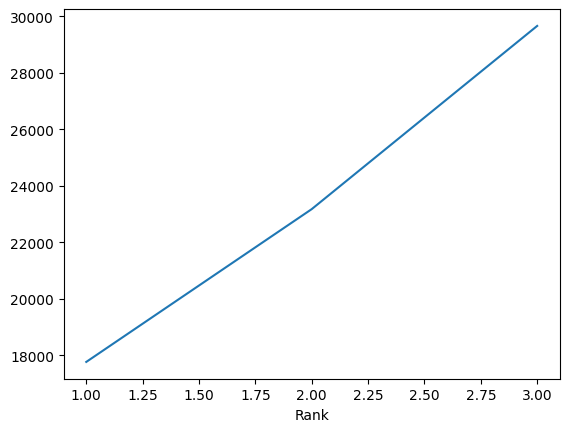

In [82]:
#plt.scatter(df2.Rank, df2.Salary)
df2.groupby('Rank')['Salary'].mean().plot()

In [83]:
df2[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


<Axes: xlabel='Year'>

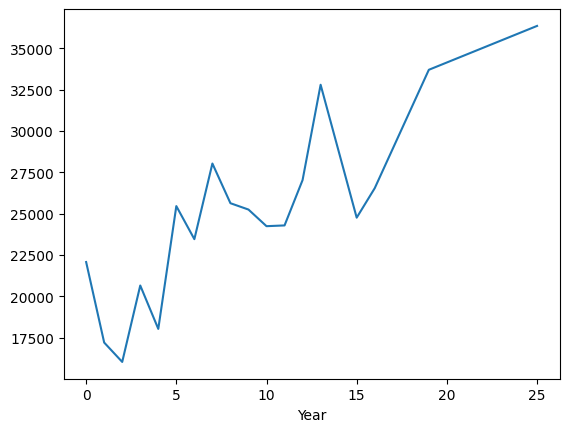

In [84]:
#plt.scatter(df2.Year, df2.Salary)
df2.groupby('Year')['Salary'].mean().plot()

In [85]:
df2[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


<Axes: xlabel='Degree'>

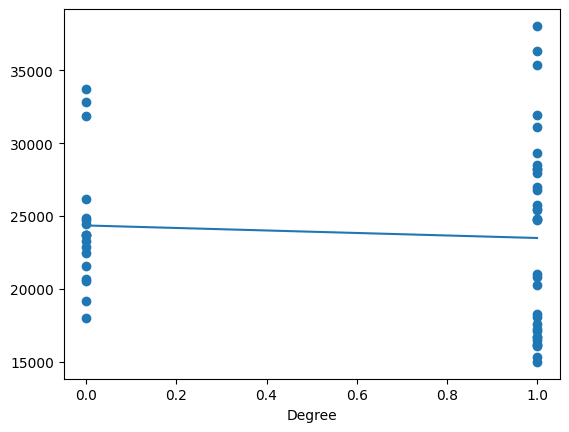

In [87]:
plt.scatter(df2.Degree, df2.Salary)
df2.groupby('Degree')['Salary'].mean().plot()

In [88]:
df2[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


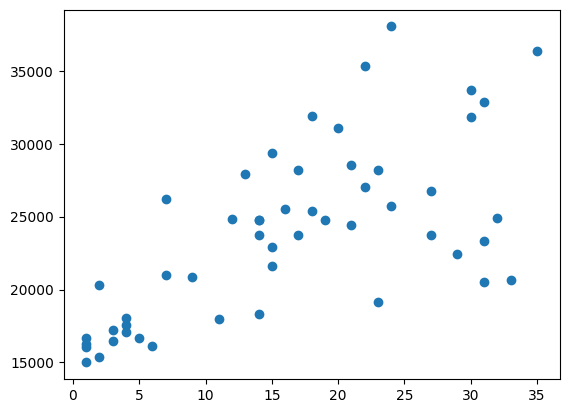

In [89]:
plt.scatter(df2.YSdeg, df2.Salary)

In [90]:
df2[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [91]:
X2=df2.iloc[:,:-1].values       # Features
y2=df2.iloc[:,-1].values        # Target

In [92]:
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.25,random_state=7)

In [93]:
from sklearn.linear_model import LinearRegression
regressor_2=LinearRegression()
regressor_2.fit(X2_train,y2_train)

LinearRegression()

In [94]:
y2_pred=regressor_2.predict(X2_test)
y2_pred

array([28896.77709808, 29343.04984524, 22951.21851751, 28579.37459707,
       25220.85660893, 21507.76431746, 18786.86027565, 21005.83114831,
       29893.95855097, 30379.05709247, 16160.50131213, 22831.34306134,
       16495.89339309])

In [95]:
from sklearn import metrics
print("R2 value is:", metrics.r2_score(y2_test,y2_pred))

R2 value is: 0.7240692028365608


Finding best combinations

In [96]:
df2.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')

In [97]:
new_df2=df2[['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']]

In [98]:
df2_col=['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

In [99]:

from itertools import combinations
c=[]
for i in range(1,len(df2_col)):
  d=list(combinations(df2_col,i))
  for j in d:
    c.append(list(j))
print(c)

[['Sex'], ['Rank'], ['Year'], ['Degree'], ['YSdeg'], ['Sex', 'Rank'], ['Sex', 'Year'], ['Sex', 'Degree'], ['Sex', 'YSdeg'], ['Rank', 'Year'], ['Rank', 'Degree'], ['Rank', 'YSdeg'], ['Year', 'Degree'], ['Year', 'YSdeg'], ['Degree', 'YSdeg'], ['Sex', 'Rank', 'Year'], ['Sex', 'Rank', 'Degree'], ['Sex', 'Rank', 'YSdeg'], ['Sex', 'Year', 'Degree'], ['Sex', 'Year', 'YSdeg'], ['Sex', 'Degree', 'YSdeg'], ['Rank', 'Year', 'Degree'], ['Rank', 'Year', 'YSdeg'], ['Rank', 'Degree', 'YSdeg'], ['Year', 'Degree', 'YSdeg'], ['Sex', 'Rank', 'Year', 'Degree'], ['Sex', 'Rank', 'Year', 'YSdeg'], ['Sex', 'Rank', 'Degree', 'YSdeg'], ['Sex', 'Year', 'Degree', 'YSdeg'], ['Rank', 'Year', 'Degree', 'YSdeg']]


function defining

In [100]:
def linear(var):
  for m in var:
    X3=df2[m].values
    y3=df2['Salary'].values
    from sklearn.model_selection import train_test_split
    X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size=0.25,random_state=7)
    from sklearn.linear_model import LinearRegression
    regressor_3=LinearRegression()
    regressor_3.fit(X3_train,y3_train)
    y3_pred=regressor_3.predict(X3_test)
    from sklearn import metrics
    print("R2 value for"+str(m)+' Vs Salary', metrics.r2_score(y3_test,y3_pred))

In [101]:
linear(c)

R2 value for['Sex'] Vs Salary -0.03649497116798006
R2 value for['Rank'] Vs Salary 0.5922258408178549
R2 value for['Year'] Vs Salary 0.35820851399182896
R2 value for['Degree'] Vs Salary -0.15126270761429694
R2 value for['YSdeg'] Vs Salary 0.24995906055824202
R2 value for['Sex', 'Rank'] Vs Salary 0.6031359730731589
R2 value for['Sex', 'Year'] Vs Salary 0.3486597238710095
R2 value for['Sex', 'Degree'] Vs Salary -0.09408520975086998
R2 value for['Sex', 'YSdeg'] Vs Salary 0.3347650748126988
R2 value for['Rank', 'Year'] Vs Salary 0.7631122808404563
R2 value for['Rank', 'Degree'] Vs Salary 0.5912859113679141
R2 value for['Rank', 'YSdeg'] Vs Salary 0.6300585430015335
R2 value for['Year', 'Degree'] Vs Salary 0.3266706811337572
R2 value for['Year', 'YSdeg'] Vs Salary 0.40580609894631037
R2 value for['Degree', 'YSdeg'] Vs Salary 0.4410430786180153
R2 value for['Sex', 'Rank', 'Year'] Vs Salary 0.7447527497016925
R2 value for['Sex', 'Rank', 'Degree'] Vs Salary 0.5985809012912066
R2 value for['Sex',

The highest r2 value is found for ['Rank','Year'] vs ['Salary'] = 0.7631122808404563

From the Combination of different models we can conclude sex is not a factor in salary. The r2 value for sex vs salary is very low which is -0.0364, and also the corelation value also very low

Performing ANOVA statistical method to find whether 'Sex' feature has any impact in 'Salary' Target variable.

In [109]:
from sklearn.feature_selection import f_regression, SelectKBest

fs= SelectKBest(score_func= f_regression, k=5)
fit= fs.fit(X2_train, y2_train)

In [111]:
print(np.round(fit.pvalues_))
print(np.round(fit.scores_))

[0. 0. 0. 0. 0.]
[  3. 133.  39.   1.  36.]


In [114]:
c= pd.DataFrame({'Column':df2.columns[:-1], 'F-value':np.round(fit.scores_), 'P-value':np.round(fit.pvalues_)})
c

,Column,F-value,P-value
0,Sex,3.0,0.0
1,Rank,133.0,0.0
2,Year,39.0,0.0
3,Degree,1.0,0.0
4,YSdeg,36.0,0.0


The F-value for Sex & Degree column is very less. Sex is not a factor.